In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/content/mobile_price_classification.csv')


In [3]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.shape

(2000, 21)

In [5]:
data.dtypes

,0
battery_power,int64
bluetooth,int64
clock_speed,float64
dual_sim,int64
front_cam,int64
4G,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


In [7]:
data.isna().sum()

,0
battery_power,0
bluetooth,0
clock_speed,0
dual_sim,0
front_cam,0
4G,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [8]:
data['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


In [9]:
x = data.drop('price_range',axis = 1)
y = data['price_range']

In [10]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x.loc[:,['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi',]] = sc.fit_transform(x[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi',]])

Test train split

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state = 42)

Creating a neural network based classifier

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(10,activation = 'relu'))
model.add(Dense(4,activation ='softmax'))

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'],run_eagerly=True)

In [17]:
history = model.fit(x_train,y_train,epochs = 100, verbose = 1 )

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.3115 - loss: 1.5201
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.3362 - loss: 1.4051
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.3687 - loss: 1.3369
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.4252 - loss: 1.2491
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.4509 - loss: 1.2034
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4902 - loss: 1.1680
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5210 - loss: 1.0958
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5672 - loss: 1.0502
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5918 - loss: 0.9993
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6262 - loss: 0.9289
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6495 - loss: 0.8890
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step

In [18]:
y_pred = model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [19]:
y_pred

array([[9.8691666e-01, 1.3083239e-02, 3.3894706e-10, 2.1117099e-19],
       [1.0665520e-07, 2.3216847e-02, 9.7631401e-01, 4.6899618e-04],
       [4.1718066e-02, 9.5761454e-01, 6.6734134e-04, 4.6642492e-11],
       ...,
       [2.1672303e-04, 9.7063380e-01, 2.9147137e-02, 2.3712507e-06],
       [1.5232821e-03, 9.7977018e-01, 1.8706389e-02, 1.5481278e-07],
       [6.9834680e-11, 1.4724155e-03, 9.8840350e-01, 1.0124127e-02]],
      dtype=float32)

Accurcy


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [22]:
accuracy_score(y_test,pred)

0.96

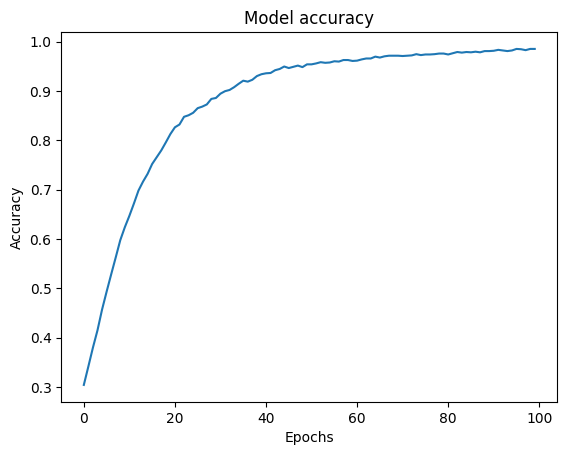

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()